# <center> **TikTok Project**
## <center> **Exploratory Data Analysis**

## **1. The problem :**

#### **1.1. Background on the TikTok scenario**  
At TikTok, our mission is to inspire creativity and bring joy. Our employees lead with curiosity and move at the speed of culture.  
Combined with our company's flat structure, you'll be given dynamic opportunities to make a real impact on a rapidly expanding company and grow your career.

TikTok users have the ability to submit reports that identify videos and comments that contain user claims.  
These reports identify content that needs to be reviewed by moderators.  
The process generates a large number of user reports that are challenging to consider in a timely manner. 

TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion.  
With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently. 

## **2. Exploratory Data Analysis :**

**The purpose** of this step is to conduct exploratory data analysis on a provided data set. Understand the dataset provided. Proceed to cleaning and reports issues with dataset. Continue the investigation, and perform further EDA on this dataset with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos. Explore the dataset and create visualizations using python and PowerBi for executive stakeholders.

### **2.1. Imports, links, and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **2.2 Data exploration and cleaning**
Start by discovering the dataset by using '.head()', '.size', and '.shape' methods in python.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296,19425,241,1,0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877,77355,19034,1161,684
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185,97690,2858,833,329
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506,239954,34812,1234,584
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167,34987,4110,547,152


In [ ]:
# Get summary information about the dataset: 
print(data.size)
print(data.shape)
print(data.info())

209924
(19084, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   claim_status              19084 non-null  object
 1   video_id                  19084 non-null  int64 
 2   video_duration_sec        19084 non-null  int64 
 3   video_transcription_text  19084 non-null  object
 4   verified_status           19084 non-null  object
 5   author_ban_status         19084 non-null  object
 6   video_view_count          19084 non-null  int64 
 7   video_like_count          19084 non-null  int64 
 8   video_share_count         19084 non-null  int64 
 9   video_download_count      19084 non-null  int64 
 10  video_comment_count       19084 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.6+ MB
None


In [ ]:
# Check for missing values : 
data.isna().sum()/len(data) * 100 # There are few missing values in the dataset
data.dropna(inplace=True) # Drop rows with missing values
data.duplicated().sum()  # No duplicates

0

In [8]:
# Summary statistics using '.describe()' applied to numerical columns
data[['video_duration_sec', 'verified_status', 'video_view_count', 
      'video_like_count', 'video_share_count','video_download_count', 
      'video_comment_count']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
video_duration_sec,19084.0,32.42,16.23,5.0,18.00,32.0,47.00,60.0
video_view_count,19084.0,254708.56,322893.28,20.0,4942.50,9954.5,504327.00,999817.0
video_like_count,19084.0,84304.64,133420.55,0.0,810.75,3403.5,125020.00,657830.0
video_share_count,19084.0,16735.25,32036.17,0.0,115.00,717.0,18222.00,256130.0
video_download_count,19084.0,1049.43,2004.30,0.0,7.00,46.0,1156.25,14994.0
video_comment_count,19084.0,349.31,799.64,0.0,1.00,9.0,292.00,9599.0


In [7]:
# Let's inspect now the categorical variables
print(data['claim_status'].value_counts())
print(data['verified_status'].value_counts())
print(data['author_ban_status'].value_counts())

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64
verified_status
not verified    17884
verified         1200
Name: count, dtype: int64
author_ban_status
active          15383
under review     2066
banned           1635
Name: count, dtype: int64


### **2.3 General visualizations :**   
Using Matplotlib and seaborn in python to understand and invistigate further our variables. 

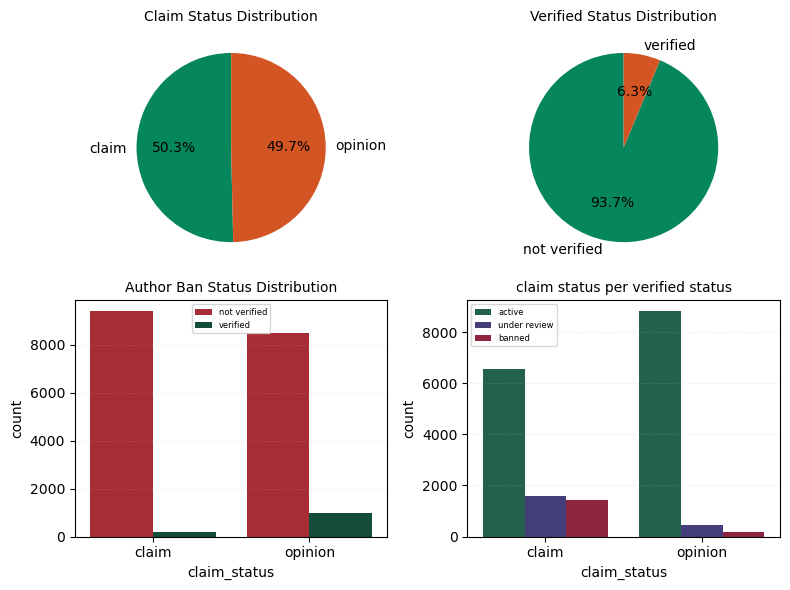

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# Pie chart for claim_status distribution
claim_counts = data['claim_status'].value_counts()
axes[0].pie(claim_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90, colors=["#05865d", "#d35523"])
axes[0].set_title('Claim Status Distribution', fontsize=10)

# Pie chart for verified_status distribution
verified_status = data['verified_status'].value_counts()
axes[1].pie(verified_status, labels=verified_status.index, colors=["#05865d", "#d35523"], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Verified Status Distribution', fontsize=10)

# Bar chart for author_ban_status distribution
sns.countplot(x='claim_status', 
              data=data, 
              ax=axes[2], 
              hue='verified_status', 
              palette={'verified': "#0a553d", 'not verified': "#BD1725"}
            )
axes[2].set_title('Author Ban Status Distribution', fontsize=10)
axes[2].tick_params(axis='x')
axes[2].legend(fontsize=6, loc='upper center')
axes[2].grid(axis='y', linestyle='dotted', alpha=0.3)

# Bar chart for verified_status distribution
sns.countplot(
    data=data,
    x='claim_status',
    hue='author_ban_status',
    hue_order=['active', 'under review', 'banned'],
    palette={'active': "#1a6b51", 'under review': "#3B3383", 'banned': "#9f1336"},
    ax=axes[3]
)
axes[3].set_title('claim status per verified status', fontsize=10)
axes[3].legend(fontsize=6, loc='upper left')
axes[3].grid(axis='y', linestyle='dotted', alpha=0.3)

plt.tight_layout()

#### **Observations :**
- There is near equal balance of opinions versus claims. This is the key variable for our predictive model. 
- Engagement(views, likes, shares, comments, downloads) is correlated with whether a video content is a claim or offers an opinion. 
- There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.
- For both claims and opinions, there are many more active authors than banned authors or authors under review;  
however, the proportion of active authors is far greater for opinion videos than for claim videos.   
Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Observations :**
- There is near equal balance of opinions versus claims. This is the key variable for our predictive model. 
- Engagement(views, likes, shares, comments, downloads) is correlated with whether a video content is a claim or offers an opinion. 
- There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.
- For both claims and opinions, there are many more active authors than banned authors or authors under review;  
however, the proportion of active authors is far greater for opinion videos than for claim videos.   
Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

### **2.4. Video duration analysis :**

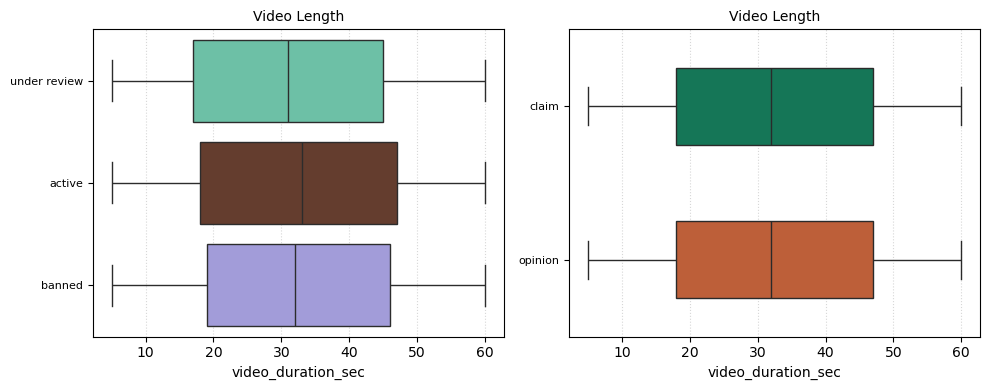

In [9]:
# video duration distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_duration_sec', y='author_ban_status', 
            hue='author_ban_status', palette=["#5fceab", "#6d3925", "#9A92E3"], ax=axes[0])
axes[0].set_title('Video Length', fontsize=10)
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)
axes[0].tick_params(axis='y', labelsize=8)

sns.boxplot(data=data, x='video_duration_sec', y='claim_status', 
            hue='claim_status', palette=["#05865d", "#d35523"], ax=axes[1], width=0.5)
axes[1].set_title('Video Length', fontsize=10)
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='dotted', alpha=0.5)
axes[1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

**Observations :** 
- All videos are 5-60 seconds in length, and the distribution is uniform. 
- The distribution doesn't seem to be affected by affected by claim_status. 
- It is however slightly different whether the author is banned, under review or active. 

### **2.5. Video views analysis :**

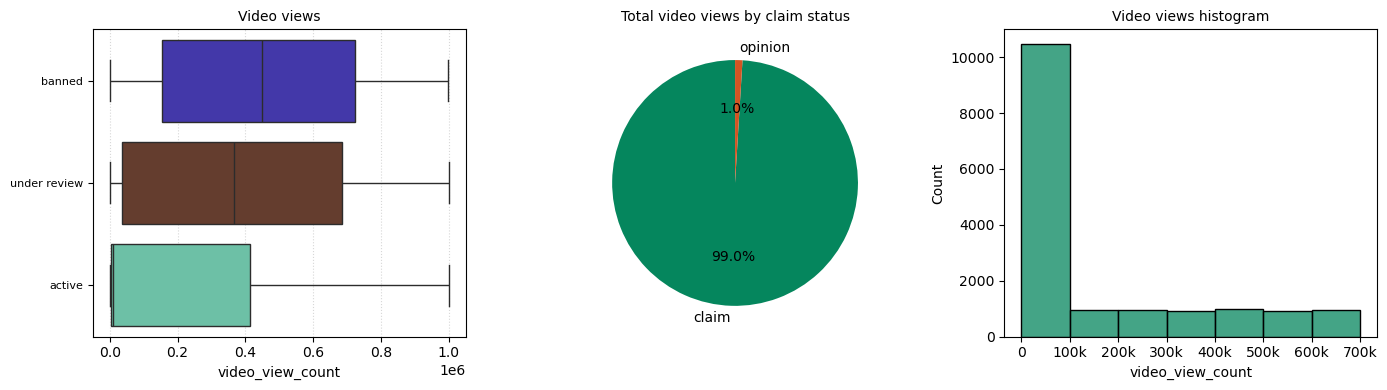

In [17]:
# Views by author status & claim status   
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_view_count', y='author_ban_status', 
            hue='author_ban_status', ax=axes[0], 
            order=['banned', 'under review', 'active'],
            palette={'active': "#5fceab", 'under review': "#6d3925", 'banned': "#3425BC"})
axes[0].set_title('Video views', fontsize=10)
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', labelsize=8)
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)

# Pie chart for total video views by claim_status
view_sums = data.groupby('claim_status')['video_view_count'].sum()
axes[1].pie(view_sums, labels=view_sums.index, colors=["#05865d", "#d35523"], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total video views by claim status', fontsize=10)

sns.histplot(data['video_view_count'], bins=range(0,(7*10**5+1),10**5), color="#05865d", ax=axes[2])
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
axes[2].set_xticks(range(0,7*10**5+1,10**5), labels=labels)
axes[2].set_title('Video views histogram', fontsize=10)


plt.tight_layout()
plt.show()

**Observations :** 
- This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. 
- Distribution of view counts > 100,000 views is uniform. 
- It is obvious that views distribution is very high when the video is classified as claim. 
- The distribution is much more skewed for active authors (boxplots visualization)

#### **2.5.0 Explore median views:**

In [12]:
data.groupby(['author_ban_status'])['video_view_count'].median().reset_index()

,author_ban_status,video_view_count
0,active,8616.0
1,banned,448201.0
2,under review,365245.5


In [19]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

**Observations:** 
- The median view counts for non-active authors are many times greater than the median view count for active authors. 
- Since you know that non-active authors are more likely to post claims,  
and that videos by non-active authors get far more views on aggregate than videos by active authors,  
then 'video_view_count' might be a good indicator of claim status.
Indeed, a quick check of the median view count by claim status bears out this assessment:

### **2.6. Video likes analysis :**

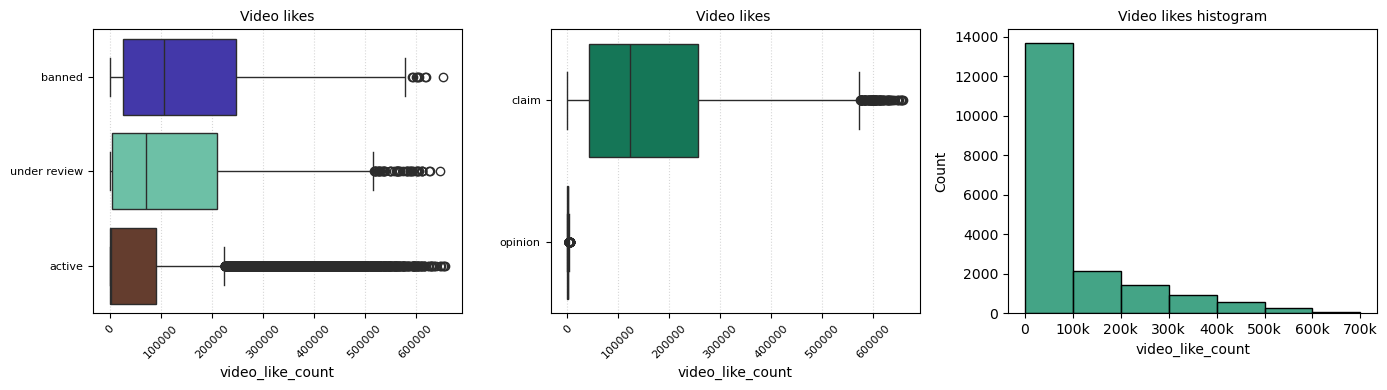

In [29]:
# likes by author status & claim status   
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_like_count', y='author_ban_status', 
            hue='author_ban_status', ax=axes[0], 
            order=['banned', 'under review', 'active'],
            palette=["#5fceab", "#6d3925", "#3425BC"])
axes[0].set_title('Video likes', fontsize=10)
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', labelsize=8)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)

sns.boxplot(data=data, x='video_like_count', y='claim_status', 
            hue='claim_status', palette=["#05865d", "#d35523"], ax=axes[1])
axes[1].set_title('Video likes ', fontsize=10)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].grid(axis='x', linestyle='dotted', alpha=0.5)

sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5), color="#05865d", ax=axes[2])
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
axes[2].set_xticks(range(0,7*10**5+1,10**5), labels=labels)
axes[2].set_title('Video likes histogram', fontsize=10)

plt.tight_layout()
plt.show()

**Observations :** 
- Similar to view count, there are far more videos with < 100,000 likes than views count. 
- However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.


### **2.7. Video share analysis :**

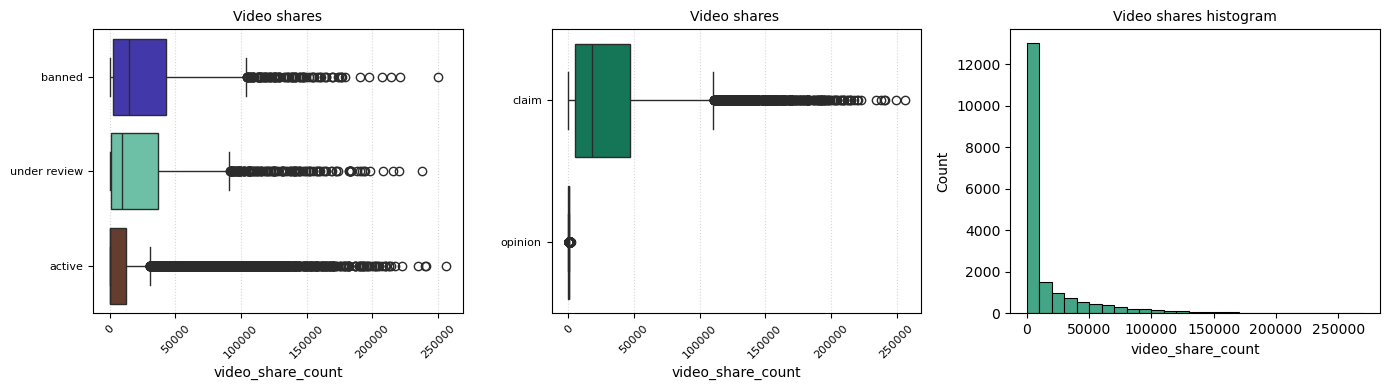

In [21]:
# shares by author status & claim status   
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_share_count', y='author_ban_status', 
            hue='author_ban_status', ax=axes[0], 
            order=['banned', 'under review', 'active'],
            palette=["#5fceab", "#6d3925", "#3425BC"])
axes[0].set_title('Video shares', fontsize=10)
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', labelsize=8)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)
sns.boxplot(data=data, x='video_share_count', y='claim_status', 
            hue='claim_status', palette=["#05865d", "#d35523"], ax=axes[1])
axes[1].set_title('Video shares ', fontsize=10)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].grid(axis='x', linestyle='dotted', alpha=0.5)

sns.histplot(data['video_share_count'], bins=range(0,(270001),10000), color="#05865d", ax=axes[2])
axes[2].set_title('Video shares histogram', fontsize=10)

plt.tight_layout()
plt.show()

**Observation :** 
- The overwhelming majority of videos had fewer than 10,000 shares. 
- The distribution is very skewed to the right.

### **2.8. Video comment analysis :**

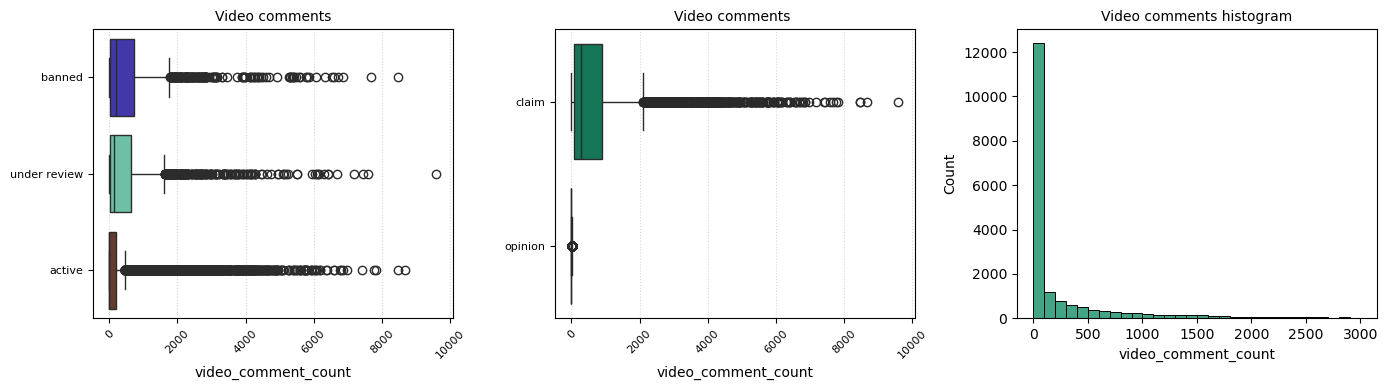

In [22]:
# comments by author status & claim status   
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_comment_count', y='author_ban_status', 
            hue='author_ban_status', ax=axes[0], 
            order=['banned', 'under review', 'active'],
            palette=["#5fceab", "#6d3925", "#3425BC"])
axes[0].set_title('Video comments', fontsize=10)
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', labelsize=8)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)
sns.boxplot(data=data, x='video_comment_count', y='claim_status', 
            hue='claim_status', palette=["#05865d", "#d35523"], ax=axes[1])
axes[1].set_title('Video comments ', fontsize=10)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].grid(axis='x', linestyle='dotted', alpha=0.5)

sns.histplot(data['video_comment_count'], bins=range(0,(3001),100), color="#05865d", ax=axes[2])
axes[2].set_title('Video comments histogram', fontsize=10)


plt.tight_layout()
plt.show()

**Observation :**   
- The vast majority of videos are grouped at the bottom of the range of values for video comment count. 
- Most videos have fewer than 100 comments. The distribution is very right-skewed.

### **2.9. Video download analysis :**

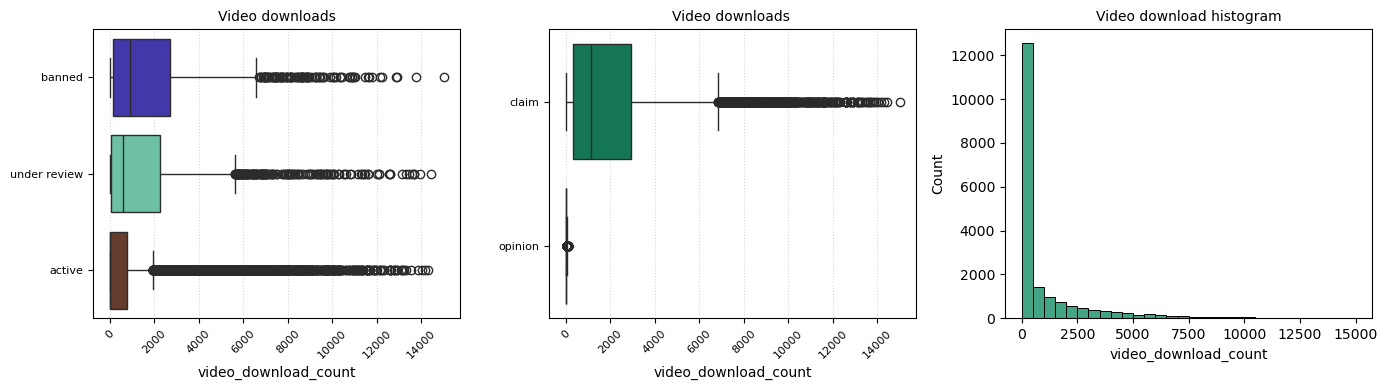

In [23]:
# comments by author status & claim status   
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.flatten()
sns.boxplot(data=data, x='video_download_count', y='author_ban_status', 
            hue='author_ban_status', ax=axes[0], 
            order=['banned', 'under review', 'active'],
            palette=["#5fceab", "#6d3925", "#3425BC"])
axes[0].set_title('Video downloads', fontsize=10)
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', labelsize=8)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0].grid(axis='x', linestyle='dotted', alpha=0.5)
sns.boxplot(data=data, x='video_download_count', y='claim_status', 
            hue='claim_status', palette=["#05865d", "#d35523"], ax=axes[1])
axes[1].set_title('Video downloads ', fontsize=10)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1].grid(axis='x', linestyle='dotted', alpha=0.5)

sns.histplot(data['video_download_count'], bins=range(0,(15001),500), color="#05865d", ax=axes[2])
axes[2].set_title('Video download histogram', fontsize=10)


plt.tight_layout()
plt.show()

**Observations :** 
- The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. 
- Again, the data is very skewed to the right.

### **2.10. Study outliers**

**a. How to deal with outliers:**

  * **Delete them :** If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
  * **Reassign them :** If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
  * **Leave them :** For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

- When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.
- The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.
- Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.
- In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

In [14]:
count_cols = ['video_view_count','video_like_count', 'video_share_count','video_download_count','video_comment_count']
for col in count_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    median = data[col].median()
    IQR = q3 - q1
    Threshold = median + 1.5*IQR
    outliers = data[col][data[col] > Threshold].count()
    print(f"{col} : {outliers} outliers, or {outliers/len(data)*100:.2f}% of the dataset")

video_view_count : 2343 outliers, or 12.28% of the dataset
video_like_count : 3468 outliers, or 18.17% of the dataset
video_share_count : 3732 outliers, or 19.56% of the dataset
video_download_count : 3733 outliers, or 19.56% of the dataset
video_comment_count : 3882 outliers, or 20.34% of the dataset


### **2.11. Scatterplot**

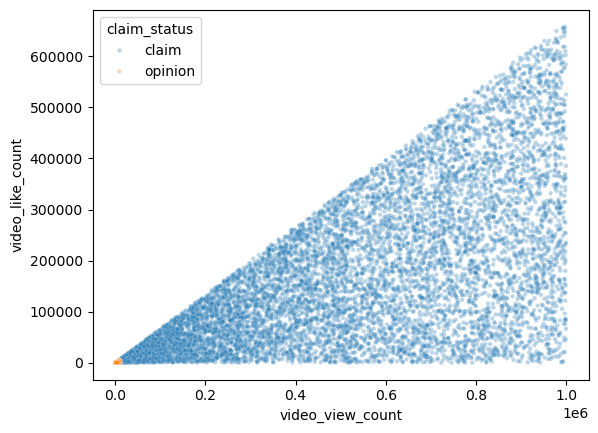

In [26]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

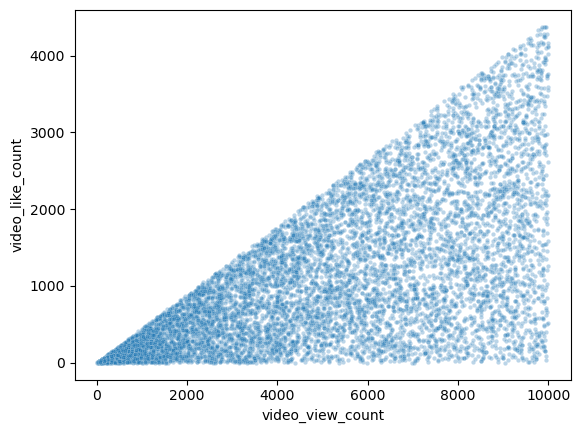

In [27]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

### **2.12. PowerBI Visualization**

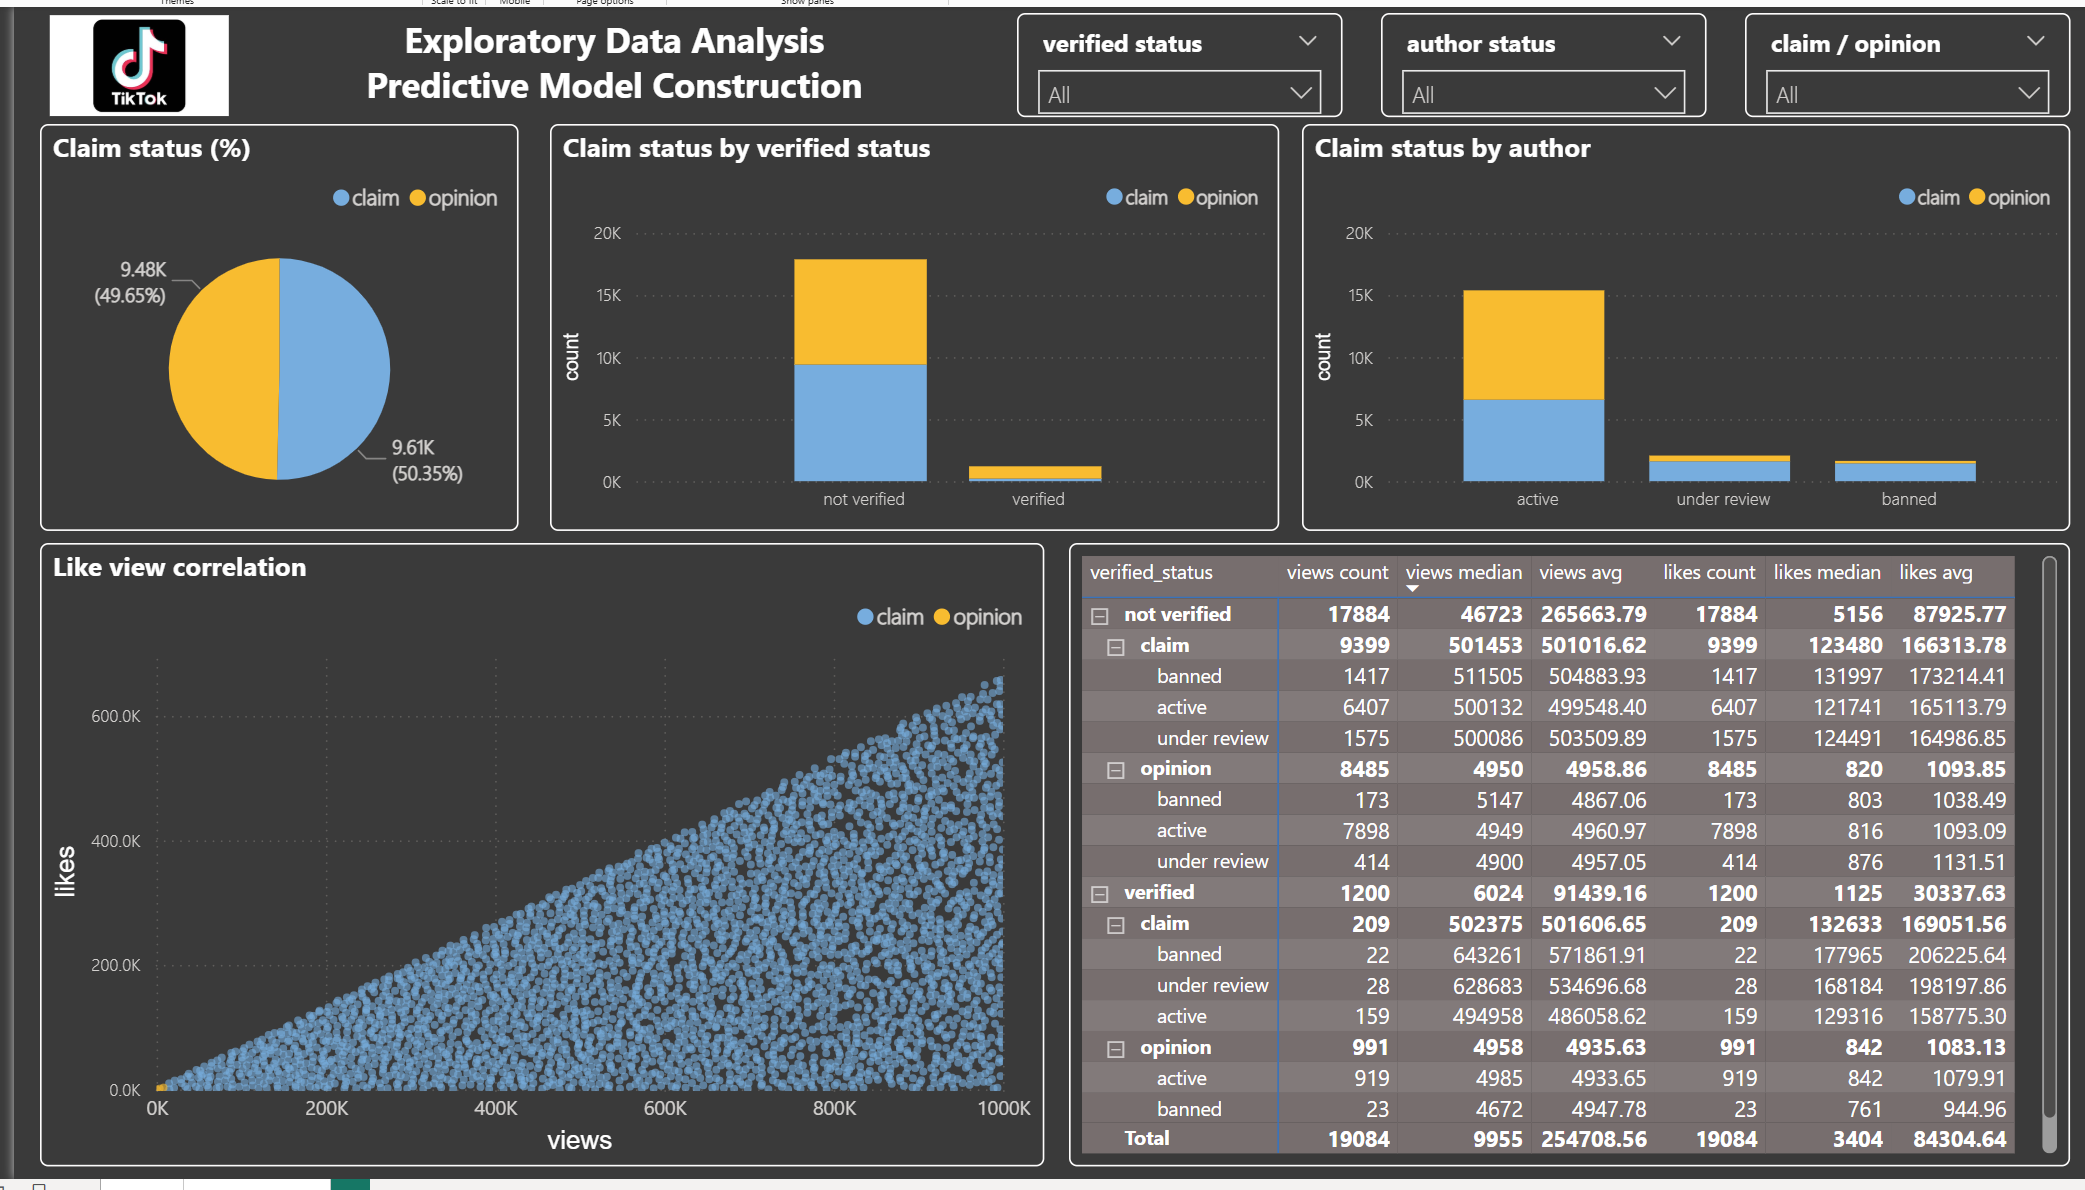

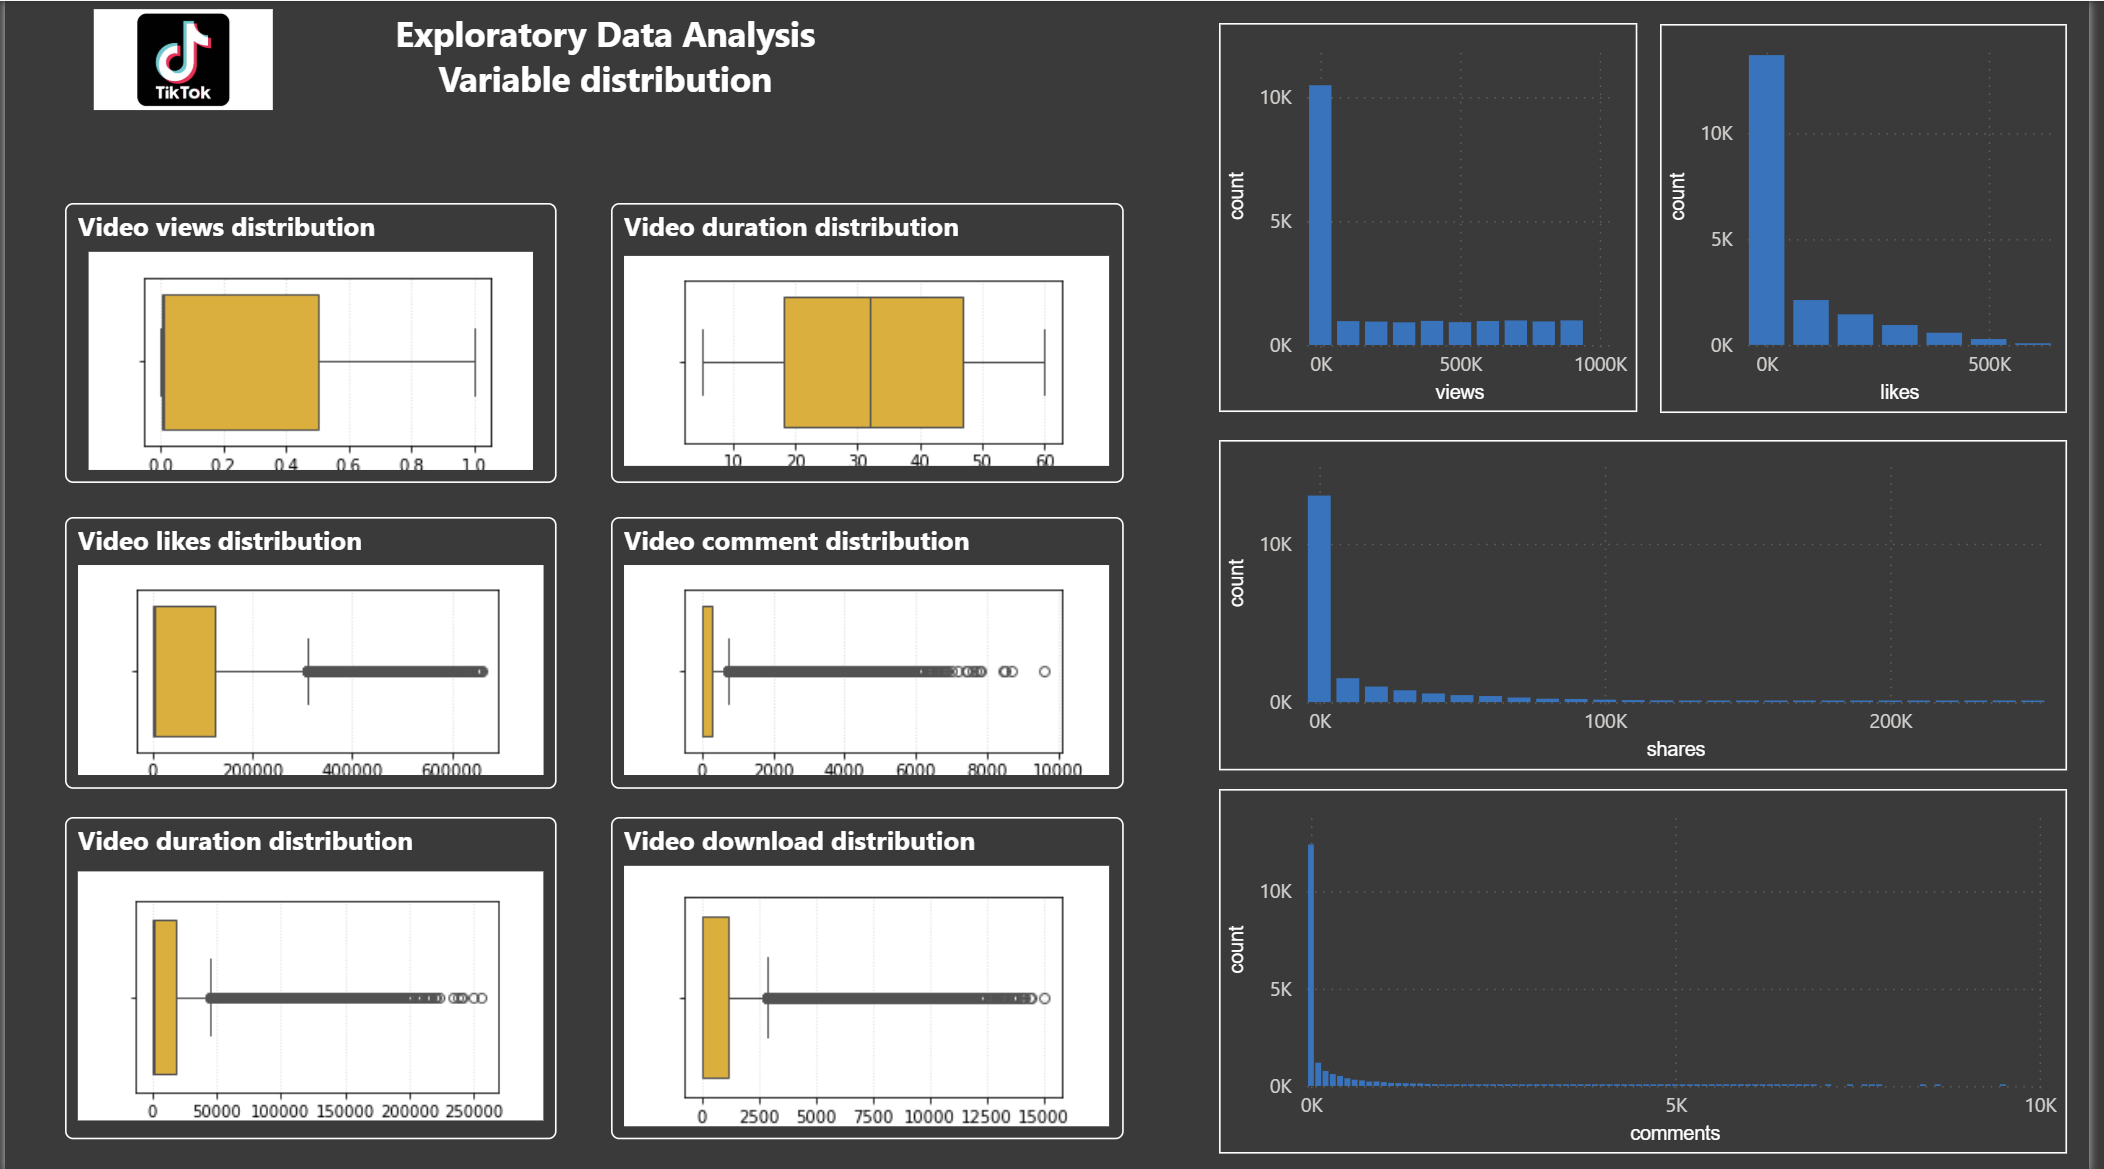

### **2.13 Results and conclusions**

* The dataset has 19,382 samples. claim_status column seem to be balanced. Slightly over 50% are claims, 49% are opinions. 
* The claim_status is the key variable for our predictive model.  
* Engagement level is strongly correlated with claim status. 
* For both claims and opinions, there are many more active authors than banned authors or authors under review;  
  however, the proportion of active authors is far greater for opinion videos than for claim videos.  
  Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.
* There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.
* Videos with banned authors have significantly higher engagement than videos with active authors.  
  Videos with authors under review fall between these two categories in terms of engagement levels.
* We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by active authors.  
* However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.
    -  Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average,  
    so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.
    -  Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review.  
    However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.